In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will explore the Logistic Regression optimization problem, and gradient descent as a means to solve this optimization.

# Part I: Simple Logistic Regression

In this example we consider the study done by Suzuki et al. (2006) where the authors consider the dependence of grain size of beach sand on the presence or absence of an endagered species of spiders. 

For the data, we have the size of the sand grains in mm and 0 denotes the absence of spiders and 1 denotes the presence of spiders.

### Data 

We are given data points:
$\begin{equation*}
\{(a_1, y_1), (a_2, y_2), \ldots, (a_m, y_m)\}
\end{equation*}$

In [2]:
a = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4, 0.409, 0.421, 0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045])
y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Scatter plot the data.  

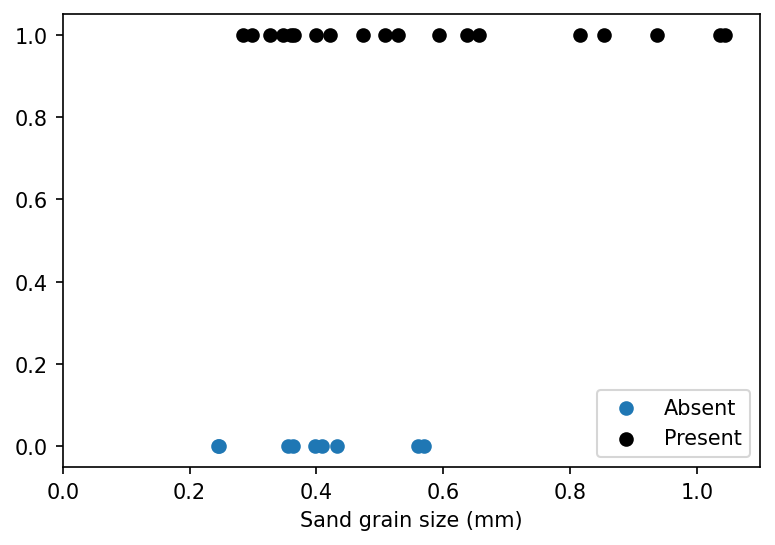

In [3]:
# Do some processing to get decent plots.
m = np.shape(a)[0]
num_ones = np.sum(y)
num_zeros = m - num_ones
a0 = np.zeros(num_zeros)
a1 = np.zeros(num_ones)
y0 = np.zeros(num_zeros)
y1 = np.ones(num_ones)
counter0 = 0
counter1 = 0
for i in range(m):
    if y[i] == 0:
        a0[counter0] = a[i]
        counter0 += 1
    else:
        a1[counter1] = a[i]
        counter1 += 1
        
plt.figure(dpi = 150)
plt.scatter(a0, y0, marker='o', label='Absent')
plt.scatter(a1, y1, marker='o', color='black', label='Present')
plt.xlabel('Sand grain size (mm)')
plt.xlim([0, 1.1])
plt.legend(loc=4)
plt.show()

### The objective

Our goal is to use this data to choose a function $\hat{f}: x \to [0,1]$ that accepts the size of grain of sand at a beach, and outputs a probability between $0$ and $1$ that the endangered species of spider is present at the beach. 

This type of problem is typically solved in Machine Learning using logistic regression. We assume that the function $\hat{f}$ follows the logistic model.
\begin{equation*}
\hat{f}(x) = \frac{\exp(x_0 + x_1a)}{1 + \exp(x_0 + x_1a)},
\end{equation*}

Our goal is to choose the parameters $x_0, x_1$ such that the functions explains the training data above well.

This is framed as the following optimization problem, as described in lecture. The exact design of this objective is motivated by Maximum-Likelihood Estimation (MLE) in Statistics, and is outside the scope of this course.

\begin{equation*}
    \min_{x_0, x_1} \sum_{i=1}^{m}\log(1 + \exp(x_0 + x_1a_i)) - y_i(x_0 + x_1a_i).
\end{equation*}

### Visualize how the model parameters $x_0$ and $x_1$ affect the shape of the logistic curve.

In [4]:
@widgets.interact_manual(x0=(-25., 25.), x1=(-35., 35.))
def plot(x0=1, x1=1):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
    t = np.array([0.245, 0.247, 0.356, 0.363, 0.398, 0.409, 0.432, 0.561, 0.569, 0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045])
    y_t = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
    ax.scatter(t[0:9], y_t[0:9], label='Absent', color="blue")
    ax.scatter(t[9:17], y_t[9:17], label='Present', color='black')
    z = np.linspace(0, 1, 1000)
    p_z = np.array([np.exp(x0 + x1*z[i])/(1 + np.exp(x0 + x1*z[i])) for i in range(1000)])
    plt.plot(z, p_z, label='Current Curve', color='red')
    x0_actual = -71
    x1_actual = 125
    p_actual = np.array([np.exp(x0_actual + x1_actual*z[i])/(1 + np.exp(x0_actual + x1_actual*z[i])) for i in range(1000)])
    plt.plot(z, p_actual, label='Optimal Curve', color='green')
    plt.legend(loc=4)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='x0', max=25.0, min=-25.0), FloatSlider(value=1.0, de…

We now solve the optimization problem using the gradient descent algorithm. Here's the algorithm for gradient descent with initial guess $x^0$, step size $\alpha$, and stopping condition based on the gradient of $f$:

> **input** $x^0$, $\alpha$, $\epsilon$  
> **set** $k = 0$  
> **while** $\| \nabla f(x^{k}) \| \geq \epsilon$ **do**  
> &nbsp;&nbsp;&nbsp;&nbsp;$x^{k+1} \leftarrow x^k - \alpha \nabla f(x^k)$  
> &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$  
> **end while**

### Exercise (a): Finding gradients

(a) Below, find the gradient of the objective function for an input $x$

In [5]:
def gradF(x):
    """
    input: x = [x_0, x_1]
    output: gradient of the objective function at x
    """
    #TODO
    return np.array([2*x[0] + x[1], 2*x[1] + x[0]])

### Exercise (b): Gradient Descent implementation

(b) Below, implement the gradient descent algorithm, whose psuedocode is provided above. 

In [20]:
def runGradientDescent(start, alpha, eps):
    """
    input: start (initial guess), alpha (step-size), eps (tolerance)
    output: final (the final estimate of the optimum), counter (number of iterations taken)
    """
    #TODO
    k = 0
    solution = start
    while(np.linalg.norm(gradF(solution)) >= eps):
        solution = solution - alpha*gradF(solution)
        k = k+1
        if(solution.all() == gradF(solution).all()):
            break
    return solution, k

Below, we run the gradient descent algorithm and visualize the learned function.

In [21]:
start = np.array([-10, 10]) # initial guess. Other values: np.array([10, 1]), np.array([1, 10]), np.array([-10, 1])
alpha = 0.5 # step size. Other values: 0.3, 0.2, 0.1, 0.05
eps = 5*1e-4 # tolerance. Other values: 1e-2, 1e-4

final, counter = runGradientDescent(start, alpha, eps)
print(final)

[-5.  5.]


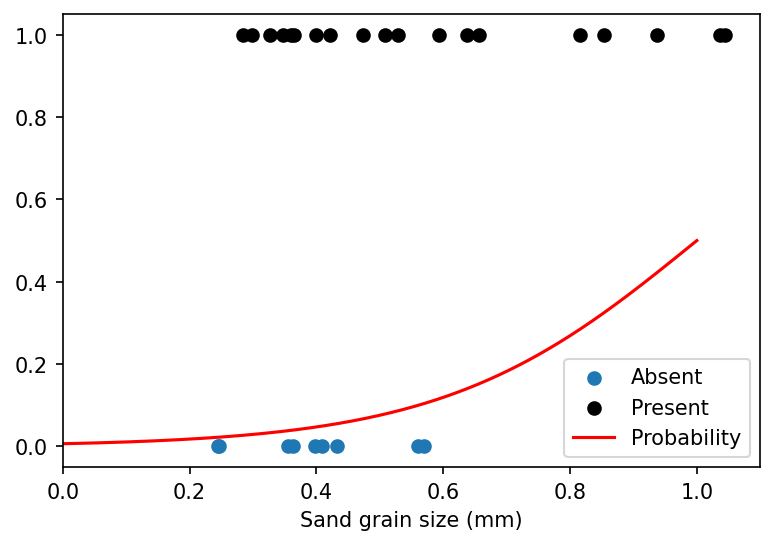

In [22]:
x = np.linspace(0, 1, 1000)
p = np.array([np.exp(final[0] + final[1]*x[i])/(1 + np.exp(final[0] + final[1]*x[i])) for i in range(1000)])
plt.figure(dpi = 150)
plt.scatter(a0, y0, marker='o', label='Absent')
plt.scatter(a1, y1, marker='o', color='black', label='Present')
plt.plot(x, p, color='red', label='Probability')
plt.xlabel('Sand grain size (mm)')
plt.legend(loc=4)
plt.xlim([0, 1.1])
plt.show()

### Exercise (c): Exploring the effect of stepsize

The function below that calculates the objective value is provided for your convenience.

In [13]:
def objective(x):
    """
    input: x = [x_0, x_1] 
    output: objective value at the given x
    """
    output = 0
    for i in range(m):
        output += np.log(1 + np.exp(x[0] + x[1]*a[i])) - y[i]*(x[0] + x[1]*a[i])
    return output

In [14]:
start = np.array([-10, 10])
eps = 5*1e-4

(c) Below, run the gradient descent algorithm on the logistic regression problem for stepsizes varying from 0.05 to 0.03 in increments of 0.05. 

1. Plot the effect of the stepsize on the objective value and the total number of iterations required to converge.
2. What happens if you increase alpha beyond 0.4?

In [12]:
#TODO: Run gradient descent algorithm for different choices of alpha
alpha_values = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
objective_values = []
iteration_values = []
for i in range(len(alpha_values)):
    alpha = alpha_values[i] #step size through array
    start = np.array([-10, 10]) # initial guess. Other values: np.array([10, 1]), np.array([1, 10]), np.array([-10, 1])
    eps = 5*1e-4 # tolerance. Other values: 1e-2, 1e-4
    final, counter = runGradientDescent(start, alpha, eps)
    objective_values.append(final)
    iteration_values.append(i)

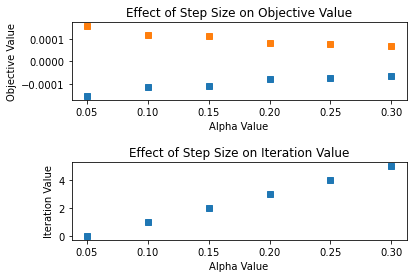

In [111]:
#TODO: Visualize effect of alpha
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
alpha_list = alpha_values.tolist()
ax1.plot(alpha_list, objective_values, 's')
ax1.set_xlabel("Alpha Value")
ax1.set_ylabel("Objective Value")
ax1.set_title("Effect of Step Size on Objective Value")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(alpha_list, iteration_values, 's')
ax2.set_xlabel("Alpha Value")
ax2.set_ylabel("Iteration Value")
ax2.set_title("Effect of Step Size on Iteration Value")
plt.subplots_adjust(hspace=0.8)
plt.show()

Increasing alpha above 0.4 fives us a sudden decrease in the objective value, from over 0.0001 to nearly 0. The two sides of the objective value then overlap as well.

### Exercise (d): Exploring the effect of stopping threshold

In [13]:
start = np.array([-10, 10])
eps = 5*1e-4
alpha = 0.3

(d) Below, run the gradient descent algorithm on the logistic regression problem for $\epsilon \in \{10^{-2}, 5\times10^{-2}, 10^{-3}, 5\times10^{-3}, 10^{-4} \}$. Plot the effect of the stepsize on the objective value and the total number of iterations required to converge.

In [14]:
#TODO: Running gradient descent algorithm for different choices of epsilon
epsilon_values = np.array([0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005])
objective_values2 = []
iteration_values2 = []
for i in range(len(epsilon_values)):
    eps = epsilon_values[i] #step size through array
    final, counter = runGradientDescent(start, alpha, eps)
    objective_values2.append(final)
    iteration_values2.append(i)

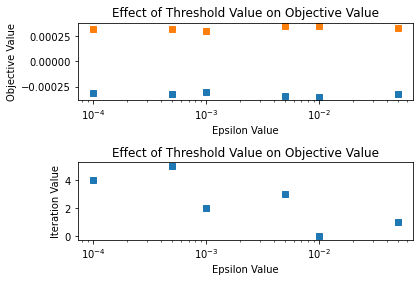

In [15]:
#TODO: Visualizing effect of epsilon
fig2 = plt.figure()
ax1 = fig2.add_subplot(2, 1, 1)
epsilon_list = epsilon_values.tolist()
ax1.plot(epsilon_list, objective_values, 's')
ax1.set_xlabel("Epsilon Value")
ax1.set_ylabel("Objective Value")
ax1.set_xscale('log')
ax1.set_title("Effect of Threshold Value on Objective Value")

ax2 = fig2.add_subplot(2, 1, 2)
ax2.plot(epsilon_list, iteration_values, 's')
ax2.set_xlabel("Epsilon Value")
ax2.set_ylabel("Iteration Value")
ax2.set_xscale('log')
ax2.set_title("Effect of Threshold Value on Objective Value")
plt.subplots_adjust(hspace=0.8)
plt.show()

# Part II: Regularized Logistic Regression 

We add a $L_2$-regularization term to the objective of the optimization problem considered above. Explicitly we now solve:

\begin{equation*}
    \min_{x_0, x_1} (\sum_{i=1}^{m}\log(1 + \exp(x_0 + x_1a_i)) - y_i(x_0 + x_1a_i)) + \frac{\lambda}{2}(x_0^2 + x_1^2) .
\end{equation*}

### Exercise (e): Find gradient of regularized objective

(e) Fill in the function below.

In [25]:
def gradF_pen(x, lamda):
    #TODO
    return 2*x*lamda

### Exercise (f): Gradient descent implementation for regularized objective

(f) Fill in the function below.

In [31]:
def runGD_penalized(start_pen, alpha_pen, eps_pen, lamda):
    #TODO
    k = 0
    finalcurr = start_pen
    finalcurrminusone = start_pen
    while(np.linalg.norm(gradF_pen(finalcurr, lamda)) >= eps_pen):
        newx = finalcurr - alpha_pen*gradF_pen(finalcurr, lamda)
        finalcurrminusone = finalcurr
        finalcurr = newx
        k = k+1
        if(finalcurrminusone.all() == gradF_pen(finalcurr, lamda).all()):
            break
    finalcurr += lamda*1/2*(finalcurr**2+finalcurrminusone**2)
    return finalcurr, k

We can use the code below to run regularized logistic regression

In [32]:
start_pen = np.array([-10, 10]) # initial guess. Other values: np.array([10, 1]), np.array([1, 10]), np.array([-10, 1])
alpha_pen = 0.15 # step size. Other values: 0. 0.01 , 0.1
lamda = 0.1 # Regularization term
eps_pen = 5*1e-3 # tolerance. Other values 1e-2, 1e-4, 1e-5

final_pen, counter_pen = runGD_penalized(start_pen, alpha_pen, eps_pen, lamda)

### Exercise (g): Compare Logistic Regression to Regularized Logistic Regression

In [33]:
@widgets.interact_manual(lamda=(0.0005, 1.50))
def plot(lamda=0.001):
    # Run the algorithm
    final_pen, counter_pen = runGD_penalized(start_pen, alpha_pen, eps_pen, lamda)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
    x = np.linspace(0, 1, 1000)
    p = np.array([np.exp(final[0] + final[1]*x[i])/(1 + np.exp(final[0] + final[1]*x[i])) for i in range(1000)])
    p_pen = np.array([np.exp(final_pen[0] + final_pen[1]*x[i])/(1 + np.exp(final_pen[0] + final_pen[1]*x[i])) for i in range(1000)])
    
    plt.scatter(a0, y0, marker='o', label='Absent')
    plt.scatter(a1, y1, marker='o', color='black', label='Present')
    plt.plot(x, p, color='red', linestyle='--', label='Logistic Reg.')
    plt.plot(x, p_pen, color='blue', label='Reg. Logistic Reg.')
    plt.xlabel('Sand grain size (mm)')
    plt.legend(loc=4)
    plt.xlim([0, 1.1])
    plt.show()
    

interactive(children=(FloatSlider(value=0.001, description='lamda', max=1.5, min=0.0005), Button(description='…

(g) Vary the hyperparameter $\lambda$ in $[0, 0.5]$ and include your observations on how the regularized logistic regression curve changes. What would happen in the limit as as $\lambda \to \infty$?

The variance of the model decreases as we increase lambda to infinity. We would, however, see an increase in bias as the total sum of the least squares decreases.

<Include your answer here>

**Reference**: *Suzuki, S., N. Tsurusaki, and Y. Kodama. 2006. Distribution of an endangered burrowing spider Lycosa ishikariana in the San'in Coast of Honshu, Japan (Araneae: Lycosidae). Acta Arachnologica 55: 79-86.*